In [37]:
import pandas as pd

# Specify the file path
file_path = "Desktop/Pdata_Final.xlsx"

# Read the .xlsx file
df = pd.read_excel(file_path)

In [38]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [39]:
RawData = pd.read_excel("Desktop/Pdata_Final.xlsx");
print('Number of rows and columns:', RawData.shape);
print('\n  \n**** Summary statistics for the numerical features: \n ')
print(RawData.describe().T)
# Save it to CSV, the copy the tabular data to your report
RawData.describe().T.to_csv("Penrose_data_summary.csv")

Number of rows and columns: (35633, 11)

  
**** Summary statistics for the numerical features: 
 
              count        mean        std     min   25%    50%    75%    max
PM10        34899.0   14.437992   8.838932   -97.0   8.7   13.5   19.0  372.0
PM2.5       33251.0    5.615308  16.562504 -2529.6   2.6    5.3    8.3  447.7
Temp        34659.0   16.623884   3.944648     3.0  14.0   17.0   20.0   28.0
Humidity    34660.0   69.807773  12.309129    26.9  60.7   70.7   79.9   92.0
Wind Speed  34602.0    2.814014   1.582643     0.2   1.5    2.6    3.9    8.7
Wind Dir    34603.0  181.104413  92.584612     1.0  89.0  214.0  238.0  357.0
NO          34127.0   10.615103  21.567136    -3.8   1.0    3.9   11.5  378.4
NO2         34113.0   14.709337  12.844220    -3.9   4.6   11.1   21.5   84.3
Nox         34128.0   25.120070  31.372887    -4.1   6.1   15.7   32.4  455.1
SO2         34633.0    0.941787   2.282407   -26.6   0.1    0.6    1.1  221.1


In [40]:
# Check for Noisy Data and count of them (Which in our case are negative number since we cant have a measurment of negative values in our dataset)
# Numerical Data
df = RawData.iloc[:, 1:13]
date_column = RawData["Date"]

print('Number of Cell Values That Are Negative:',len(df[df<0]));
#Repalcing noisy data with Nan Value
df = df.mask(df < 0)
#df[df<0] = np.nan
df = df.join(date_column)


df['Date'] = pd.to_datetime(df.Date , format = '%Y-%m-%d %H:%M:%S')

#filter the data up to time 15 november 2022 
#since there is so missing data after this time and we will this time slot for prediction
df = df[df['Date'] <= "2022-11-15 23:00:00"]

df

Number of Cell Values That Are Negative: 35633


,PM10,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2,Date
0,18.6,NaN,17.0,80.5,1.7,228.0,3.4,14.2,17.5,1.5,2018-11-29 00:00:00
1,21.4,NaN,16.0,82.2,0.6,109.0,1.4,20.1,21.5,NaN,2018-11-29 01:00:00
2,17.8,NaN,16.0,84.1,0.7,288.0,3.0,25.3,28.3,2.2,2018-11-29 02:00:00
3,17.5,NaN,16.0,83.8,0.5,305.0,5.7,35.1,40.8,2.6,2018-11-29 03:00:00
4,21.7,NaN,17.0,84.1,0.6,224.0,10.1,42.0,52.1,2.1,2018-11-29 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
34547,1.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,2022-11-15 19:00:00
34548,8.5,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2022-11-15 20:00:00
34549,0.0,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,2022-11-15 21:00:00
34550,3.0,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,2022-11-15 22:00:00


In [41]:
# Moving Average:
n = 24
df['Temp'] = df['Temp'].fillna(df['Temp'].rolling(window=n, min_periods=1).mean().round())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].rolling(window=n, min_periods=1).mean().round())

 # Set 'Date' column as the index
if not df.index.name == 'Date':
    df.set_index('Date', inplace=True)
    
df['SO2'] = df['SO2'].fillna(df['SO2'].interpolate(method='time'))
df['NO2'] = df['NO2'].fillna(df['NO2'].interpolate(method='time'))
df['NO'] = df['NO'].fillna(df['NO'].interpolate(method='time'))
df['Nox'] = df['Nox'].fillna(df['Nox'].interpolate(method='time'))
df['Wind Dir'] = df['Wind Dir'].fillna(df['Wind Dir'].interpolate(method='time'))
df['Wind Speed'] = df['Wind Speed'].fillna(df['Wind Speed'].interpolate(method='time'))
df['PM10'] = df['PM10'].fillna(df['PM10'].interpolate(method='time'))
df['PM2.5'] = df['PM2.5'].fillna(df['PM10'].interpolate(method='time'))

df.reset_index(inplace=True)

df

,Date,PM10,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2
0,2018-11-29 00:00:00,18.6,18.6,17.0,80.5,1.7,228.0,3.4,14.2,17.5,1.50
1,2018-11-29 01:00:00,21.4,21.4,16.0,82.2,0.6,109.0,1.4,20.1,21.5,1.85
2,2018-11-29 02:00:00,17.8,17.8,16.0,84.1,0.7,288.0,3.0,25.3,28.3,2.20
3,2018-11-29 03:00:00,17.5,17.5,16.0,83.8,0.5,305.0,5.7,35.1,40.8,2.60
4,2018-11-29 04:00:00,21.7,21.7,17.0,84.1,0.6,224.0,10.1,42.0,52.1,2.10
...,...,...,...,...,...,...,...,...,...,...,...
34547,2022-11-15 19:00:00,1.0,0.4,17.0,79.0,2.4,217.0,41.5,31.2,72.6,0.60
34548,2022-11-15 20:00:00,8.5,0.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.90
34549,2022-11-15 21:00:00,0.0,2.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.80
34550,2022-11-15 22:00:00,3.0,4.6,17.0,81.0,2.4,217.0,41.5,31.2,72.6,0.80


In [42]:
# Compute lag column (1 period shift)
df['lag1'] = df['PM10'].shift(24) #24 hours before

# Compute lag2 column (2 periods shift)
df['lag2'] = df['PM10'].shift(48) #48 hours before

In [43]:
df = df[df['Date'] >= "2018-12-01 00:00:00"]
df.reset_index(inplace=True)

df

,index,Date,PM10,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2,lag1,lag2
0,48,2018-12-01 00:00:00,15.8,6.5,18.0,76.1,5.4,52.0,0.2,0.8,1.0,1.70,10.2,18.6
1,49,2018-12-01 01:00:00,18.1,25.6,18.0,79.1,4.8,60.0,0.1,0.6,0.5,1.55,9.1,21.4
2,50,2018-12-01 02:00:00,15.9,1.7,18.0,76.4,4.7,61.0,0.0,0.5,0.5,1.40,8.6,17.8
3,51,2018-12-01 03:00:00,16.1,1.7,18.0,75.1,5.2,53.0,0.0,0.3,0.2,1.60,9.9,17.5
4,52,2018-12-01 04:00:00,18.5,18.5,18.0,79.2,5.0,56.0,0.2,0.3,0.4,1.50,7.1,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,34547,2022-11-15 19:00:00,1.0,0.4,17.0,79.0,2.4,217.0,41.5,31.2,72.6,0.60,21.4,21.6
34500,34548,2022-11-15 20:00:00,8.5,0.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.90,16.2,10.6
34501,34549,2022-11-15 21:00:00,0.0,2.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.80,13.5,19.9
34502,34550,2022-11-15 22:00:00,3.0,4.6,17.0,81.0,2.4,217.0,41.5,31.2,72.6,0.80,16.7,9.8


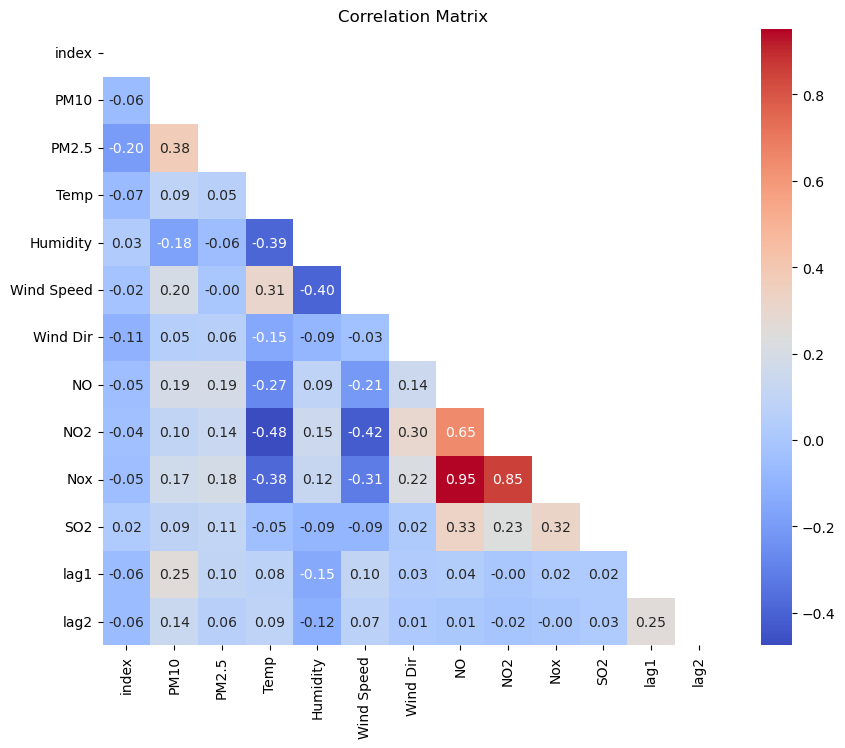

In [44]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the correlation heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax)

# Set plot title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

In [45]:
import pandas as pd


# Specify the path and filename for the new dataset
output_file = 'Desktop/Pdata_new_dataset.csv'

# Save the data to the new dataset
df.to_csv(output_file, index=False)


In [46]:
import pandas as pd

# Specify the file path
file_path = "Desktop/Pdata_new_dataset.csv"

# Read the .xlsx file
df = pd.read_csv(file_path)

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Select the variables for regression
variables = ['PM2.5','lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
X = df[variables]
y = df['PM10']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Split the data into training and testing sets
train_size = int(0.7 * len(df))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results
print(results.summary())

# Obtain the predicted values
y_pred = results.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     967.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:01:25   Log-Likelihood:                -82493.
No. Observations:               24152   AIC:                         1.650e+05
Df Residuals:                   24142   BIC:                         1.651e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8540      0.568      5.026      0.0

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format ='retina'

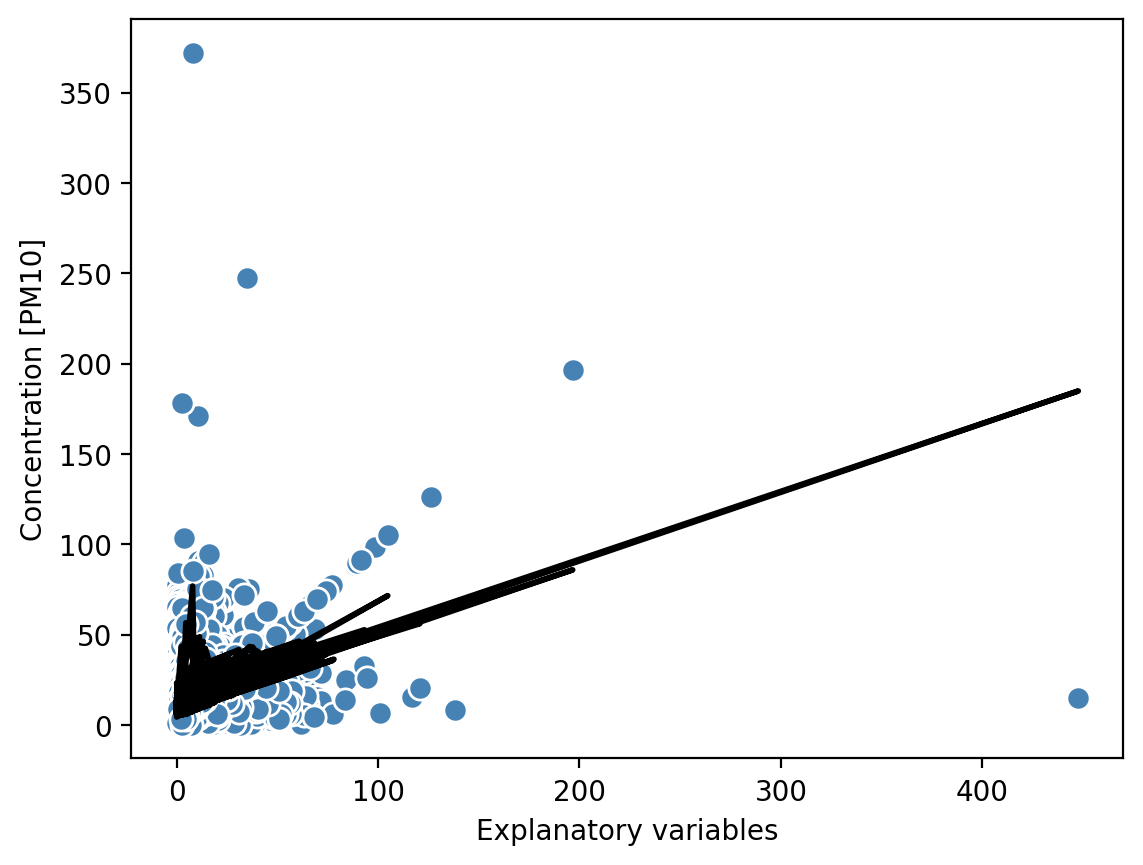

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df[['PM2.5','lag1', 'lag2','Temp','Humidity','Wind Speed', 'Wind Dir','NO','NO2','SO2']].values
y = df['PM10'].values

# Applying Sklearn linear regression model
slr = LinearRegression()
slr.fit(x, y)

def lin_reg_plot(X, y, model):
    plt.scatter(X[:, 0], y, c='steelblue', edgecolor='white', s=70)  # Plotting the first feature against y
    plt.plot(X[:, 0], model.predict(X), color='black', lw=2)  # Plotting the regression line
    plt.xlabel('Explanatory variables')
    plt.ylabel('Concentration [PM10]')
    plt.show()

lin_reg_plot(x, y, slr)

The varying thickness of the regression line could be an indication of heteroscedasticity in the data, which means that the variance of the residuals (the differences between the actual values and the predicted values) is not constant across the range of the independent variable. This could be because of the presence of outliers or the violation of certain assumptions of the linear regression model. One common assumption is that the error terms should have constant variance (homoscedasticity).

In [52]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a column of ones as the constant term to the feature matrix X
X_constant = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Calculate the VIF for each feature
vif = [variance_inflation_factor(X_constant, i) for i in range(X_constant.shape[1])]

# Create a DataFrame to display the VIF values
vif_data = pd.DataFrame({'Feature': ['Constant'] + list(X.columns), 'VIF': vif})
vif_data = vif_data.set_index('Feature')

# Display the VIF values
print(vif_data)


                 VIF
Feature             
Constant    0.000000
const       0.000000
PM2.5       1.054674
lag1        1.095670
lag2        1.081418
Temp        1.522793
Humidity    1.402787
Wind Speed  1.426088
Wind Dir    1.133585
NO2         1.718903
SO2         1.087851


Check for multicollinearity: Based on these VIF values, it appears that multicollinearity is not a major issue in our model.

Breusch-Pagan test ----
Lagrange multiplier statistic: 471.40689400990385
p-value: 5.648686297626817e-95
f-value: 53.0886812968305
f p-value: 1.5967387390597602e-96

Goldfeld-Quandt test ----
F statistic: 1.2962098760017584
p-value: 3.483745472119517e-65


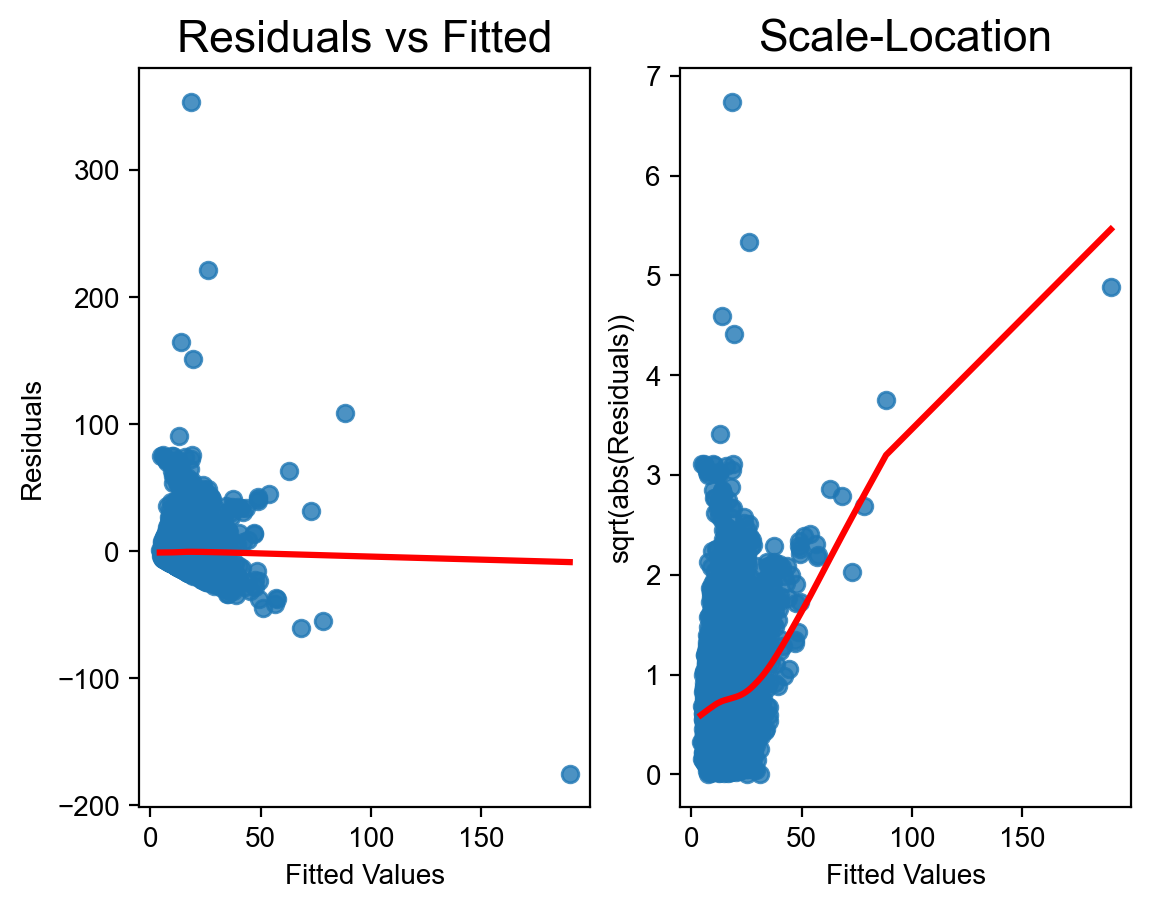

In [54]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
import matplotlib.pyplot as plt

def homoscedasticity_test(model):
    fitted_vals = model.fittedvalues
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1, 2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    # Perform Breusch-Pagan test
    names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_test = lzip(names, het_breuschpagan(resids, model.model.exog))

    # Perform Goldfeld-Quandt test
    gq_test = lzip(['F statistic', 'p-value'], het_goldfeldquandt(resids, model.model.exog)[:-1])

    print('Breusch-Pagan test ----')
    for name, stat in bp_test:
        print(f'{name}: {stat}')

    print('\nGoldfeld-Quandt test ----')
    for name, stat in gq_test:
        print(f'{name}: {stat}')


# Fit the linear regression model
lin_reg = sm.OLS(y, X_constant).fit()

# Call the homoscedasticity_test function
homoscedasticity_test(lin_reg)


sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)


Check for heteroscedasticity. The Breusch-Pagan test checks for heteroscedasticity in the residuals. The low p-value suggests that there is evidence of heteroscedasticity in the data. The Goldfeld-Quandt test also tests for heteroscedasticity, specifically for the presence of heteroscedasticity against the alternative that the variances are not different. The low p-value indicates evidence of heteroscedasticity in the data.

In [56]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create your time series regression model
model = sm.OLS(y_train, X_train)

# Fit the model and calculate residuals
results = model.fit()
residuals = results.resid

# Calculate the autocorrelation function (ACF)
acf_vals = acf(residuals, nlags=10)

# Find the first lag with ACF value below a threshold (e.g., 0.05)
lag_order = np.argmax(acf_vals < 0.05)

# Fit the model with Newey-West standard errors
nw_results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lag_order})

# Get coefficient estimates and robust standard errors
coefs = nw_results.params
robust_se = nw_results.bse

# # Print the coefficient estimates and robust standard errors
# print("Coefficient Estimates:")
# print(coefs)
# print("\nRobust Standard Errors (Newey-West):")
# print(robust_se)

# Print the regression results
print(results.summary())

# Make predictions on the test set
y_pred = results.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     928.7
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:09:08   Log-Likelihood:                -83540.
No. Observations:               24152   AIC:                         1.671e+05
Df Residuals:                   24142   BIC:                         1.672e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4124      0.575      5.935      0.0

There are issues with the normality of residuals, potential multicollinearity, and possibly autocorrelation.

In [64]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Heteroscedasticity test (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test p-value:", p_value)

# Autocorrelation test (Durbin-Watson test)
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
print("Durbin-Watson statistic:", dw_statistic)

# # Perform Ljung-Box test
# lb_statistic, lb_pvalue = acorr_ljungbox(results.resid)
# print("Ljung-Box test p-values:", lb_pvalue)


Breusch-Pagan test p-value: 0.0
Durbin-Watson statistic: 1.995024714712515
Ljung-Box test p-values: lb_pvalue


These are tests for heteroscedasticity (Breusch-Pagan test) and autocorrelation (Durbin-Watson test). it seems that there is heteroscedasticity in the residuals. However, there is no significant autocorrelation present in the residuals, suggesting that consecutive residuals are not significantly correlated.

In [65]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the initial regression model and calculate residuals
model = sm.OLS(y_train, X_train)
results = model.fit()
residuals = results.resid

# Calculate the squared residuals
squared_residuals = np.square(residuals)

# Assign weights based on the inverse of squared residuals
weights = 1.0 / squared_residuals

# Fit the weighted least squares (WLS) regression model
wls_model = sm.WLS(y_train, X_train, weights=weights)
wls_results = wls_model.fit()

# Print the regression results
print(wls_results.summary())

# Make predictions on the test set using the WLS model
y_pred = wls_results.predict(X_test)

# Calculate evaluation metrics for the WLS model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the WLS model
print("\nEvaluation Metrics (WLS Model):")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.107e+07
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:24:01   Log-Likelihood:                -63932.
No. Observations:               24152   AIC:                         1.279e+05
Df Residuals:                   24142   BIC:                         1.280e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4281      0.008    429.437      0.0

In [66]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

# Fit the regression model
model = sm.WLS(y_train, X_train)
results = model.fit()

# Heteroscedasticity test (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test p-value:", p_value)

# Autocorrelation test (Durbin-Watson test)
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
print("Durbin-Watson statistic:", dw_statistic)

# # Perform Ljung-Box test
# lb_statistic, lb_pvalue = acorr_ljungbox(results.resid)
# print("Ljung-Box test p-values:", lb_pvalue)

Breusch-Pagan test p-value: 0.0
Durbin-Watson statistic: 1.995024714712515


In [68]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the regression model
model = sm.WLS(y_train, X_train)
results = model.fit()

# Calculate heteroscedasticity-consistent standard errors
robust_results = results.get_robustcov_results(cov_type='HC3')

# Extract coefficient estimates and robust standard errors
coefs = robust_results.params
robust_se = robust_results.bse

# Print the regression results
print(wls_results.summary())

# Make predictions on the test set using the WLS model
y_pred = wls_results.predict(X_test)

# Calculate evaluation metrics for the WLS model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the WLS model
print("\nEvaluation Metrics (WLS Model):")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.107e+07
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:28:32   Log-Likelihood:                -63932.
No. Observations:               24152   AIC:                         1.279e+05
Df Residuals:                   24142   BIC:                         1.280e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4281      0.008    429.437      0.0

In [70]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the regression model
model = sm.WLS(y_train, X_train)
results = model.fit()

# Heteroscedasticity test (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test p-value:", p_value)

# Autocorrelation test (Durbin-Watson test)
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
print("Durbin-Watson statistic:", dw_statistic)

# Calculate heteroscedasticity-consistent standard errors
robust_results = results.get_robustcov_results(cov_type='HC3')

# Extract coefficient estimates and robust standard errors
coefs = robust_results.params
robust_se = robust_results.bse

# Print the coefficient estimates and robust standard errors
print("Coefficient Estimates:")
print(coefs)
print("\nRobust Standard Errors (HC3):")
print(robust_se)


Breusch-Pagan test p-value: 0.0
Durbin-Watson statistic: 1.995024714712515
Coefficient Estimates:
[ 3.41240158e+00  3.79909482e-01  1.83153281e-01  5.39541608e-02
  1.08066468e-01 -3.22608385e-02  1.26103799e+00 -1.86490072e-03
  1.26376641e-01  8.70515224e-02]

Robust Standard Errors (HC3):
[0.60418972 0.06798043 0.01228223 0.00810781 0.0230421  0.00522201
 0.03803206 0.00061204 0.00923347 0.07375823]


In [71]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

# Fit the robust regression model using Huber-White estimator
model = sm.RLM(y_train, X_train)
results = model.fit()

# Heteroscedasticity test (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test p-value:", p_value)

# Autocorrelation test (Durbin-Watson test)
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
print("Durbin-Watson statistic:", dw_statistic)

# Print the coefficient estimates
print("Coefficient Estimates:")
print(results.params)

# Print the robust standard errors
print("Robust Standard Errors (Huber-White):")
print(results.bse)

# Print the regression results
print(results.summary())


Breusch-Pagan test p-value: 0.0
Durbin-Watson statistic: 1.986077271985276
Coefficient Estimates:
const         3.074525
PM2.5         0.440492
lag1          0.162807
lag2          0.048157
Temp          0.100741
Humidity     -0.036010
Wind Speed    1.245808
Wind Dir     -0.000756
NO2           0.123114
SO2           0.076522
dtype: float64
Robust Standard Errors (Huber-White):
const         0.472663
PM2.5         0.005442
lag1          0.004814
lag2          0.004679
Temp          0.012704
Humidity      0.003910
Wind Speed    0.030356
Wind Dir      0.000469
NO2           0.004150
SO2           0.018060
dtype: float64
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                24152
Model:                            RLM   Df Residuals:                    24142
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                     

Ridge regression (also known as Tikhonov regularisation) adds a penalty term to the OLS objective function, which helps to reduce the impact of multicollinearity in the data. It works by adding a term proportional to the square of the coefficients to the loss function, encouraging smaller and more balanced coefficients. Ridge regression can be particularly effective when there is high multicollinearity among the predictors.

In [76]:
print(df.isnull().sum())


index         0
Date          0
PM10          0
PM2.5         0
Temp          0
Humidity      0
Wind Speed    0
Wind Dir      0
NO            0
NO2           0
Nox           0
SO2           0
lag1          0
lag2          0
dtype: int64


In [78]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')


In [87]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select the variables for regression
variables = ['PM2.5', 'lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
X = df[variables]
y = df['PM10']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of the alpha parameter

# Fit the model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_scaled = ridge_model.predict(X_test_scaled)

# Fit the model to the training data without scaling
ridge_model.fit(X_train, y_train)

# Predict on the test data without scaling
y_pred = ridge_model.predict(X_test)

# Calculate evaluation metrics for the scaled data
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

# Calculate evaluation metrics for the unscaled data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics for the scaled data
print("\nEvaluation Metrics (Scaled Data):")
print("Root Mean Squared Error (RMSE):", rmse_scaled)
print("Mean Absolute Error (MAE):", mae_scaled)
print("R-squared:", r2_scaled)
print("Mean Squared Error:", mse_scaled)

# Print the evaluation metrics for the unscaled data
print("\nEvaluation Metrics (Unscaled Data):")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
print("Mean Squared Error:", mse)

# Print the regression results
print(results.summary())


Evaluation Metrics (Scaled Data):
Root Mean Squared Error (RMSE): 7.999547248018155
Mean Absolute Error (MAE): 5.261307790994584
R-squared: 0.22647999060234236
Mean Squared Error: 63.99275617327484

Evaluation Metrics (Unscaled Data):
Root Mean Squared Error (RMSE): 7.999547004348327
Mean Absolute Error (MAE): 5.261304283996959
R-squared: 0.22648003772588066
Mean Squared Error: 63.99275227477828
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                24152
Model:                            RLM   Df Residuals:                    24142
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 16 Jun 2023          

In [88]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

# Fit the robust regression model using Huber-White estimator
model = sm.RLM(y_train, X_train)
results = model.fit()

# Heteroscedasticity test (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test p-value:", p_value)

# Autocorrelation test (Durbin-Watson test)
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
print("Durbin-Watson statistic:", dw_statistic)

# Print the coefficient estimates
print("Coefficient Estimates:")
print(results.params)

# Print the robust standard errors
print("Robust Standard Errors (Huber-White):")
print(results.bse)

# Print the regression results
print(results.summary())


Breusch-Pagan test p-value: 0.0
Durbin-Watson statistic: 1.9859758813602246
Coefficient Estimates:
PM2.5         0.439424
lag1          0.167893
lag2          0.052129
Temp          0.155436
Humidity     -0.014248
Wind Speed    1.326501
Wind Dir     -0.000027
NO2           0.131519
SO2           0.103765
dtype: float64
Robust Standard Errors (Huber-White):
PM2.5         0.005440
lag1          0.004772
lag2          0.004647
Temp          0.009278
Humidity      0.002095
Wind Speed    0.027846
Wind Dir      0.000455
NO2           0.003893
SO2           0.017977
dtype: float64
                    Robust linear Model Regression Results                    
Dep. Variable:                   PM10   No. Observations:                24152
Model:                            RLM   Df Residuals:                    24143
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:             

In [96]:
import numpy as np
import statsmodels.api as sm

# # Apply logarithmic transformation to the 'PM10' variable
# df['PM10_log'] = np.log(df['PM10'])

# Square root transformation
df['PM10_sqrt'] = np.sqrt(df['PM10'])


# Select the variables for regression
variables = ['PM2.5', 'lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2', 'PM10_log']
X = df[variables]
# y = df['PM10_log']
y = df['PM10_sqrt']




# Create the GLS model
gls_model = sm.GLS(y_train, X_train)

# Specify the variance structure
# Here, we assume heteroscedasticity of unknown form
gls_model = gls_model.fit(cov_type='HC3')

# Print the coefficient estimates
print("Coefficient Estimates:")
print(gls_model.params)

# Print the robust standard errors
print("Robust Standard Errors (HC3):")
print(gls_model.bse)

# Print the regression results
print(gls_model.summary())



Coefficient Estimates:
PM2.5         0.379930
lag1          0.187632
lag2          0.057770
Temp          0.170687
Humidity     -0.008431
Wind Speed    1.348110
Wind Dir     -0.001033
NO2           0.136730
SO2           0.098954
dtype: float64
Robust Standard Errors (HC3):
PM2.5         0.067934
lag1          0.012307
lag2          0.008238
Temp          0.020722
Humidity      0.002905
Wind Speed    0.035000
Wind Dir      0.000577
NO2           0.009441
SO2           0.080676
dtype: float64
                                 GLS Regression Results                                
Dep. Variable:                   PM10   R-squared (uncentered):                   0.802
Model:                            GLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                          1.065e+04
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:08:21   Log-Likelihood:        

In [98]:
import numpy as np
import statsmodels.api as sm

# # Apply logarithmic transformation to the 'PM10' variable
# df['PM10_log'] = np.log(df['PM10'])

# Square root transformation
df['PM10_sqrt'] = np.sqrt(df['PM10'])


# Select the variables for regression
variables = ['PM2.5', 'lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2', 'PM10_log']
X = df[variables]
# y = df['PM10_log']
y = df['PM10_sqrt']

# Create the GLS model
gls_model = sm.GLS(y_train, X_train)

# Fit the GLS model
gls_results = gls_model.fit(cov_type='HC3')

# Heteroscedasticity test (Breusch-Pagan test)
_, p_value, _, _ = het_breuschpagan(gls_results.resid, gls_results.model.exog)
print("Breusch-Pagan test p-value:", p_value)

# Print the coefficient estimates
print("Coefficient Estimates:")
print(gls_results.params)

# Print the robust standard errors
print("Robust Standard Errors (HC3):")
print(gls_results.bse)

# Print the regression results
print(gls_results.summary())


Breusch-Pagan test p-value: 0.0
Coefficient Estimates:
PM2.5         0.379930
lag1          0.187632
lag2          0.057770
Temp          0.170687
Humidity     -0.008431
Wind Speed    1.348110
Wind Dir     -0.001033
NO2           0.136730
SO2           0.098954
dtype: float64
Robust Standard Errors (HC3):
PM2.5         0.067934
lag1          0.012307
lag2          0.008238
Temp          0.020722
Humidity      0.002905
Wind Speed    0.035000
Wind Dir      0.000577
NO2           0.009441
SO2           0.080676
dtype: float64
                                 GLS Regression Results                                
Dep. Variable:                   PM10   R-squared (uncentered):                   0.802
Model:                            GLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                          1.065e+04
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15

In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



# Specify the dependent variable and the explanatory variables
y = df['PM10']
X = df[['PM2.5', 'lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']]

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Define the order of the ARIMA model
p = 1  # Replace with appropriate value
d = 0  # Replace with appropriate value
q = 1  # Replace with appropriate value

# Fit the ARIMAX model
model = sm.tsa.ARIMA(y, order=(p, d, q), exog=X)
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   PM10   No. Observations:                34504
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -113205.153
Date:                Fri, 16 Jun 2023   AIC                         226436.307
Time:                        15:11:00   BIC                         226546.141
Sample:                             0   HQIC                        226471.315
                              - 34504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.775e-09   4.43e-11    -62.636      0.000   -2.86e-09   -2.69e-09
PM2.5          0.2754      0.001    374.226      0.000       0.274       0.277
lag1           0.0385      0.004      9.449      0.0

Polinomial regression. 

In [134]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Specify the dependent variable and the explanatory variables
y = df['PM10']
X = df[['PM2.5','lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']]

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial features to an OLS model
poly_ols = sm.OLS(y, X_poly)
poly_ols_results = poly_ols.fit()

# Predict using the polynomial regression model
y_pred_poly = poly_ols_results.predict(X_poly)

# Evaluate the model
mse_poly = mean_squared_error(y, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

# Print the regression results with coefficients
print("Polynomial Regression Results:")
print(poly_ols_results.summary(xname=poly_features.get_feature_names(X.columns)))


Mean Squared Error (Polynomial Regression): 56.87665326592458
Polynomial Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     265.6
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:51:18   Log-Likelihood:            -1.1867e+05
No. Observations:               34504   AIC:                         2.375e+05
Df Residuals:                   34449   BIC:                         2.379e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [122]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_poly:", y_pred_poly.shape)


Shape of y_test: (10352,)
Shape of y_pred_poly: (34504,)


In [135]:
import numpy as np

# Calculate RMSE
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
print("Root Mean Squared Error (Polynomial Regression):", rmse_poly)

# Calculate MAE
mae_poly = np.mean(np.abs(y - y_pred_poly))
print("Mean Absolute Error (Polynomial Regression):", mae_poly)


Root Mean Squared Error (Polynomial Regression): 7.541661174166112
Mean Absolute Error (Polynomial Regression): 5.164097976375581


In [125]:
import statsmodels.stats.diagnostic as diag

# Calculate the residuals from the polynomial regression model
residuals = y - y_pred_poly

# Perform the Breusch-Pagan test
_, p_value, _, _ = diag.het_breuschpagan(residuals, X_poly)

# Print the p-value of the Breusch-Pagan test
print("Breusch-Pagan test p-value:", p_value)


Breusch-Pagan test p-value: 4.019691194703125e-27


In the final regression, we have heterosc. and no autocorr. problem!!

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
     Variable        VIF
0       PM2.5   2.347518
1        lag1   4.006123
2        lag2   3.963501
3        Temp  15.244593
4    Humidity  13.389512
5  Wind Speed   4.966031
6    Wind Dir   5.172392
7         NO2   3.535549
8         SO2   1.277097


In [140]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Specify the dependent variable and the explanatory variables
y = df['PM10']
X = df[['PM2.5', 'lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']]

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial features to an OLS model
poly_ols = sm.OLS(y, X_poly)
poly_ols_results = poly_ols.fit()

# Get the p-values of the variables
p_values = poly_ols_results.pvalues[1:]

# Identify the insignificant variables
insignificant_variables = [i for i, p_value in enumerate(p_values) if p_value >= 0.05]

# Drop the insignificant variables from the feature matrix
X_poly_updated = np.delete(X_poly, insignificant_variables, axis=1)

# Get the updated variable names
updated_variable_names = [name for i, name in enumerate(poly_features.get_feature_names(X.columns)) if i not in insignificant_variables]

# Fit the updated polynomial features to an OLS model
poly_ols_updated = sm.OLS(y, X_poly_updated)
poly_ols_results_updated = poly_ols_updated.fit()

# Predict using the updated polynomial regression model
y_pred_poly_updated = poly_ols_results_updated.predict(X_poly_updated)

# Evaluate the updated model
mse_poly_updated = mean_squared_error(y, y_pred_poly_updated)
print("Mean Squared Error (Polynomial Regression):", mse_poly_updated)

# Print the updated regression results with coefficients
print("Polynomial Regression Results (Updated):")
print(poly_ols_results_updated.summary(xname=updated_variable_names))


Mean Squared Error (Polynomial Regression): 66.10893995437702
Polynomial Regression Results (Updated):
                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     228.2
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:06:36   Log-Likelihood:            -1.2127e+05
No. Observations:               34504   AIC:                         2.426e+05
Df Residuals:                   34470   BIC:                         2.429e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [130]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Specify the dependent variable and the explanatory variables
y = df['PM10']
X = df[['PM2.5', 'lag1', 'lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']]

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly_squared = X_poly ** 2

# Fit the polynomial features to an OLS model
poly_ols = sm.OLS(y, X_poly_squared)
poly_ols_results = poly_ols.fit()

# Predict using the polynomial regression model
y_pred_poly = poly_ols_results.predict(X_poly_squared)

# Evaluate the model
mse_poly = mean_squared_error(y, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

# Print the regression results with coefficients
print("Polynomial Regression Results:")
print(poly_ols_results.summary(xname=poly_features.get_feature_names(X.columns)))


Mean Squared Error (Polynomial Regression): 59.90754909258878
Polynomial Regression Results:
                                 OLS Regression Results                                
Dep. Variable:                   PM10   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              2550.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:48:01   Log-Likelihood:                     -1.1957e+05
No. Observations:               34504   AIC:                                  2.392e+05
Df Residuals:                   34450   BIC:                                  2.397e+05
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                          c

In [133]:
import numpy as np

# Calculate RMSE
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
print("Root Mean Squared Error (Polynomial Regression):", rmse_poly)

# Calculate MAE
mae_poly = np.mean(np.abs(y - y_pred_poly))
print("Mean Absolute Error (Polynomial Regression):", mae_poly)


Root Mean Squared Error (Polynomial Regression): 7.739996711406845
Mean Absolute Error (Polynomial Regression): 5.373615131672024


In [131]:
import statsmodels.stats.diagnostic as diag

# Calculate the residuals from the polynomial regression model
residuals = y - y_pred_poly

# Perform the Breusch-Pagan test
_, p_value, _, _ = diag.het_breuschpagan(residuals, X_poly)

# Print the p-value of the Breusch-Pagan test
print("Breusch-Pagan test p-value:", p_value)

Breusch-Pagan test p-value: 1.926689596870325e-35


In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
     Variable        VIF
0       PM2.5   2.347518
1        lag1   4.006123
2        lag2   3.963501
3        Temp  15.244593
4    Humidity  13.389512
5  Wind Speed   4.966031
6    Wind Dir   5.172392
7         NO2   3.535549
8         SO2   1.277097


Fist Model with a lower RMSE and MAE values would be considered better than the last model in terms of predictive accuracy.
